# Análisis Exploratorio de Datos (EDA)

Este notebook realiza un análisis exploratorio de datos para el proyecto de predicción de precios de arriendo para propiedades residenciales en los municipios del Valle de Aburrá, Antioquia. A continuación, se conectará a la API de Finca Raíz, se explorarán los datos y se visualizarán las características relevantes.

### Análisis exploratorio de datos

1) Carga y revisión de datos

* Se revisa la estructura del dataset y el tipo de datos para identificar posibles errores en los tipos de variables (por ejemplo, fechas como tipo cadenas).

2) Valores nulos

* Se identifican columnas con valores faltantes y se decide cómo manejarlas (imputación o eliminación).

3) Estadísticas descriptivas

* Se obtiene la media, mediana, valores mínimos y máximos para entender la dispersión de los datos.

4) Distribución de precios

* Se visualiza la distribución de precios para detectar sesgo y valores atípicos.

5) Relación entre variables

* Se estudia cómo influyen variables como área construida, estrato y ubicación en el precio.

6) Correlaciones

* Se usa un heatmap para ver cómo se relacionan las variables numéricas entre sí.

7) Valores atípicos

* Se detectan propiedades con precios extremadamente altos o bajos mediante boxplots.

8) Ubicación y precio

* Si hay coordenadas, se analiza si ciertas zonas tienen precios significativamente diferentes.

In [14]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Configuración de visualización
sns.set(style='whitegrid')

# Cargar los datos procesados
data_path = '../data/raw/propiedades_fincaraiz_completas.csv'  
df = pd.read_csv(data_path, sep=';', encoding='utf-8-sig')

# Mostrar las primeras filas del dataset
df.head()

,id,titulo,descripcion,direccion,ciudad,departamento,barrio,Zona,Comuna,latitud,...,url_anuncio,propietario,telefono,tipo_propietario,direccion_propietario,fecha_publicacion,fecha_actualizacion,facilidades,video,redes_sociales
0,192064635.0,Apartamento en Arriendo,114-02-251 Inmobiliaria en Medellín arrienda a...,"Urbanización Prados Del Este, Carrera 39, El P...",Medellín,Antioquia,Milla de Oro,Suroriente,No disponible,6.204681,...,https://www.fincaraiz.com.co/apartamento-en-ar...,CONFORT GESTORES INMOBILIARIOS SAS,30121,inmobiliaria,NaN,2025-02-24,2025-02-28,"['Ascensor', 'Baño Auxiliar', 'Calentador', 'C...",https://www.youtube.com/embed/CXuMpT7Z7_w,{'facebook': 'https://www.facebook.com/sharer/...
1,191809215.0,Apartamento en Arriendo,Descubre este encantador apartamento en primer...,CR 43 23 30 INT 102,Medellín,Antioquia,Castropol,Nororiente,Manrique,6.263439,...,https://www.fincaraiz.com.co/apartamento-en-ar...,INMOBILIARIA PROTEBIENES,31363,inmobiliaria,NaN,2024-12-18,2025-02-27,"['Balcón', 'Baño Independiente', 'Cerca centro...",NaN,{'facebook': 'https://www.facebook.com/sharer/...
2,192079484.0,Casa en Arriendo,¡Casa de 152 m2!\n\nExcelente Casa ubicada en ...,C.R MONTJUIC - CL 23 SUR # 25 B 114 - INT 116,Medellín,Antioquia,Loma Benedictinos,Suroriente,Comuna 4,6.175741,...,https://www.fincaraiz.com.co/casa-en-arriendo/...,Interbienes Compañia Inmobiliaria,30176,inmobiliaria,Cra 43 A No 27A Sur - 86 Oficina 220,2025-02-27,2025-02-28,"['Acceso Pavimentado', 'Balcón', 'Baño Auxilia...",NaN,{'facebook': 'https://www.facebook.com/sharer/...
3,191960988.0,Apartamento en Arriendo,APARTAMENTO EN ARRIENDO UBICADO EN LA UNIDAD ...,CL 34 C 88 B 66 INT 615 BL 4,Medellín,Antioquia,La Almeria,Centro,La candelaria,6.247638,...,https://www.fincaraiz.com.co/apartamento-en-ar...,Alquiventas,25006,inmobiliaria,Calle 44 No 72-16,2025-02-03,2025-02-25,"['Acceso Pavimentado', 'Ascensor', 'Auditorio'...",https://www.youtube.com/embed/i5s_AHI2B10,{'facebook': 'https://www.facebook.com/sharer/...
4,192061285.0,Apartamento en Arriendo,Arriendo apartamento a 2 cuadras de la estacio...,estacion acuarela,Medellín,Antioquia,Belén,Occidente,San javier,6.258954,...,https://www.fincaraiz.com.co/apartamento-en-ar...,Inmobiliaria Tobon,30461,inmobiliaria,____________,2025-02-24,2025-02-26,"['Acceso Pavimentado', 'Ascensor', 'Balcón', '...",NaN,{'facebook': 'https://www.facebook.com/sharer/...


## Descripción del Dataset

Aquí se proporciona una descripción general del conjunto de datos, incluyendo el número de filas, columnas y tipos de datos.

In [15]:
# Descripción del dataset
df.info()

# Estadísticas descriptivas
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23689 entries, 0 to 23688
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     23668 non-null  float64
 1   titulo                 23668 non-null  object 
 2   descripcion            23668 non-null  object 
 3   direccion              23666 non-null  object 
 4   ciudad                 23668 non-null  object 
 5   departamento           23668 non-null  object 
 6   barrio                 23668 non-null  object 
 7   Zona                   23668 non-null  object 
 8   Comuna                 23668 non-null  object 
 9   latitud                23668 non-null  float64
 10  longitud               23668 non-null  float64
 11  precio                 23668 non-null  float64
 12  moneda                 23668 non-null  object 
 13  tipo_de_inmueble       23668 non-null  object 
 14  estado                 2084 non-null   object 
 15  ha

,id,latitud,longitud,precio,habitaciones,baños,estrato,pisos_edificio,piso_ubicacion,parqueaderos,gastos_comunes
count,2.366800e+04,23668.000000,23668.000000,2.366800e+04,23668.000000,23668.000000,23668.000000,23668.000000,23662.000000,23668.000000,2.366800e+04
mean,1.593680e+08,6.199276,-75.557347,5.809329e+06,2.735254,2.389978,4.792293,2.700693,2.995224,1.104994,2.990191e+04
std,6.951790e+07,0.194737,1.443769,6.079005e+07,1.243279,1.122612,6.392954,6.177238,6.370446,1.128685,3.057803e+06
min,5.538766e+06,0.000000,-75.781669,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.913648e+08,6.162379,-75.603976,2.300000e+06,2.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,1.917615e+08,6.182625,-75.582451,3.300000e+06,3.000000,2.000000,4.000000,0.000000,0.000000,1.000000,0.000000e+00
75%,1.919772e+08,6.228705,-75.567698,5.000000e+06,3.000000,3.000000,5.000000,3.000000,3.000000,1.000000,0.000000e+00
max,1.920857e+08,28.123546,0.000000,7.700000e+09,78.000000,22.000000,110.000000,403.000000,403.000000,15.000000,4.700000e+08


In [16]:
# Resumen de valores nulos
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Valores nulos:\n", missing_values[missing_values > 0])

Valores nulos:
 estado                   21605
video                    19923
antigüedad                6239
direccion_propietario     4577
area_privada_m2           3144
tipo_propietario           594
piso_ubicacion              27
direccion                   23
area_construida_m2          23
descripcion                 21
id                          21
titulo                      21
precio                      21
longitud                    21
latitud                     21
ciudad                      21
Comuna                      21
departamento                21
barrio                      21
Zona                        21
estrato                     21
baños                       21
tipo_de_inmueble            21
habitaciones                21
moneda                      21
gastos_comunes              21
pisos_edificio              21
parqueaderos                21
propietario                 21
url_anuncio                 21
imagenes                    21
telefono               

In [ ]:
#Analizar los tipos de datos y convertir si es necesario
df.dtypes

id                       float64
titulo                    object
descripcion               object
direccion                 object
ciudad                    object
departamento              object
barrio                    object
Zona                      object
Comuna                    object
latitud                  float64
longitud                 float64
precio                   float64
moneda                    object
tipo_de_inmueble          object
estado                    object
habitaciones             float64
baños                    float64
area_construida_m2        object
area_privada_m2           object
estrato                  float64
pisos_edificio           float64
piso_ubicacion           float64
parqueaderos             float64
antigüedad                object
gastos_comunes           float64
imagenes                  object
url_anuncio               object
propietario               object
telefono                  object
tipo_propietario          object
direccion_

In [18]:
# Estadísticas descriptivas de las variables numéricas
print(df.describe())

                 id       latitud      longitud        precio  habitaciones  \
count  2.366800e+04  23668.000000  23668.000000  2.366800e+04  23668.000000   
mean   1.593680e+08      6.199276    -75.557347  5.809329e+06      2.735254   
std    6.951790e+07      0.194737      1.443769  6.079005e+07      1.243279   
min    5.538766e+06      0.000000    -75.781669  0.000000e+00      0.000000   
25%    1.913648e+08      6.162379    -75.603976  2.300000e+06      2.000000   
50%    1.917615e+08      6.182625    -75.582451  3.300000e+06      3.000000   
75%    1.919772e+08      6.228705    -75.567698  5.000000e+06      3.000000   
max    1.920857e+08     28.123546      0.000000  7.700000e+09     78.000000   

              baños       estrato  pisos_edificio  piso_ubicacion  \
count  23668.000000  23668.000000    23668.000000    23662.000000   
mean       2.389978      4.792293        2.700693        2.995224   
std        1.122612      6.392954        6.177238        6.370446   
min        0

In [19]:
# Estadísticas descriptivas de las variables categóricas
print(df.describe(include='object'))

                          titulo  \
count                      23668   
unique                        76   
top     Apartamento en  Arriendo   
freq                       15811   

                                              descripcion  \
count                                               23668   
unique                                              22164   
top     Los datos de los inmuebles promocionados en la...   
freq                                                  154   

                            direccion    ciudad departamento         barrio  \
count                           23666     23668        23668          23668   
unique                          16305        33            7            700   
top     Sabaneta, Antioquia, Colombia  Medellín    Antioquia  Pan de azucar   
freq                              292     10161        23651           1396   

                 Zona         Comuna moneda tipo_de_inmueble  ...  \
count           23668          23668  23668     

In [20]:
#Filtra los datos que tengan un precio menor a 120000000
df = df[df['precio'] <= 120000000]

## Visualización de datos

A continuación, se realizarán algunas visualizaciones para entender mejor la distribución de los datos y las relaciones entre las variables.

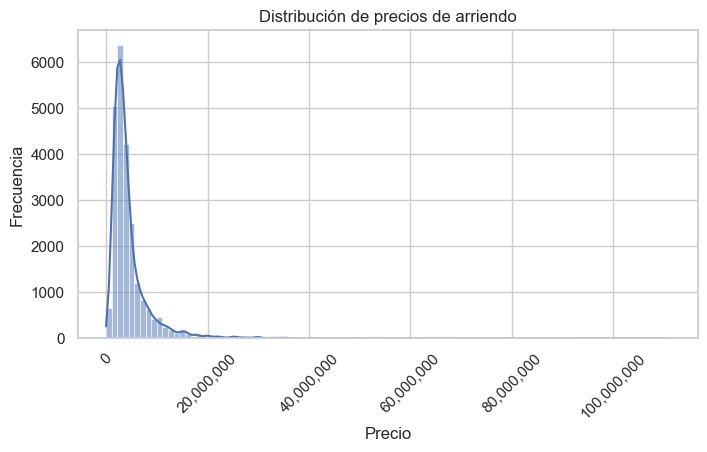

In [21]:
# Distribución del precio de arriendo
plt.figure(figsize=(8, 4))
sns.histplot(df['precio'], bins=100, kde=True)
plt.title('Distribución de precios de arriendo')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Formatear los valores del eje x para que no se muestren en notación científica
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Rotar las etiquetas del eje x a 45 grados
plt.xticks(rotation=45)

plt.show()

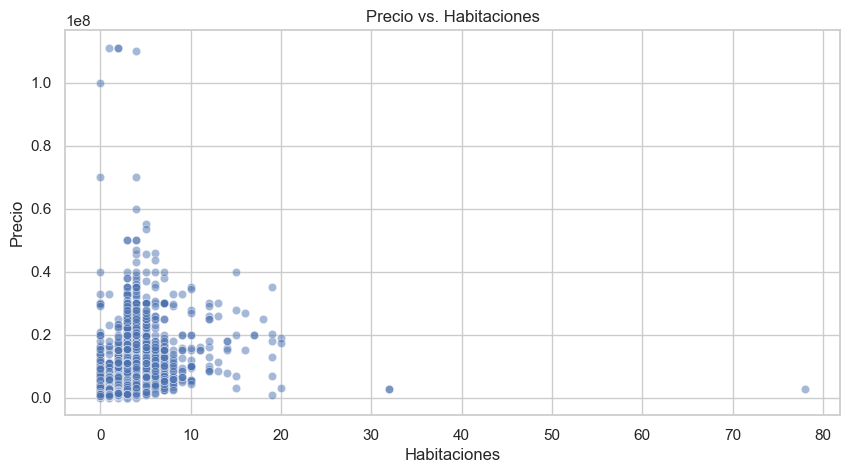

In [22]:
# Relación entre precio y habitaciones
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='habitaciones', y='precio', alpha=0.5)
plt.title('Precio vs. Habitaciones')
plt.xlabel('Habitaciones')
plt.ylabel('Precio')
plt.show()

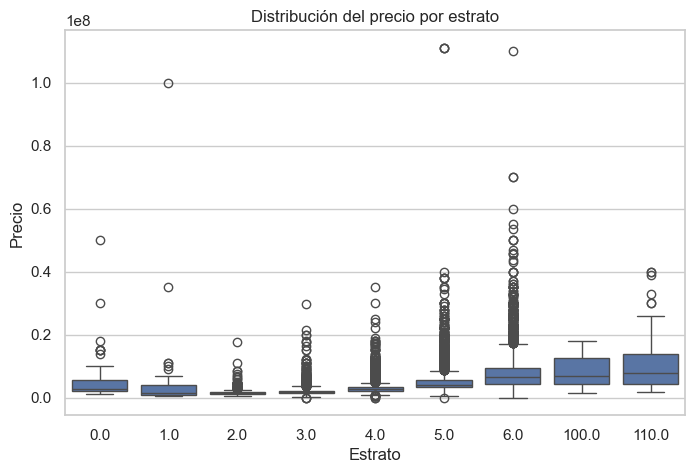

In [23]:
# Relación entre precio y estrato
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='estrato', y='precio')
plt.title('Distribución del precio por estrato')
plt.xlabel('Estrato')
plt.ylabel('Precio')
plt.show()

## Correlación entre variables

Se analizará la correlación entre las variables numéricas del dataset.

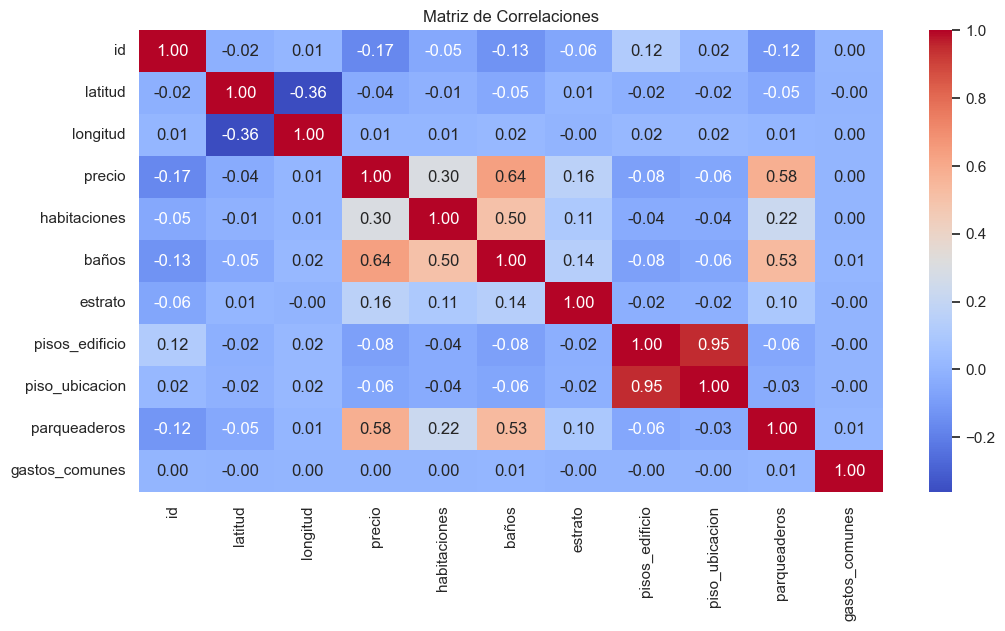

In [24]:
#Mapa de correlación entre variables numéricas
numerical_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 6))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlaciones')
plt.show()

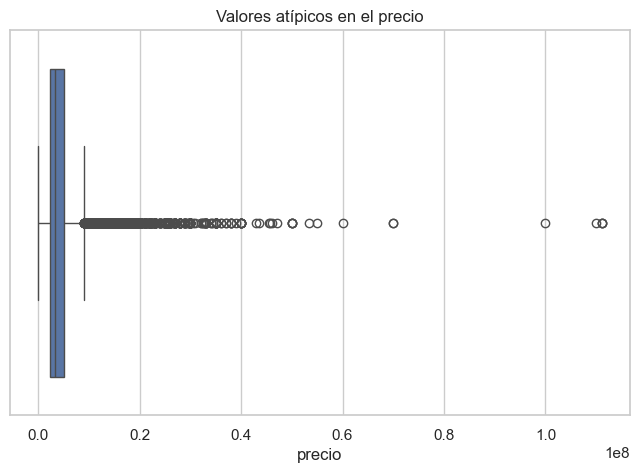

In [26]:
# 10. Valores atípicos en el precio
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['precio'])
plt.title('Valores atípicos en el precio')
#plt.ticklabel_format(style='plain')
plt.show()

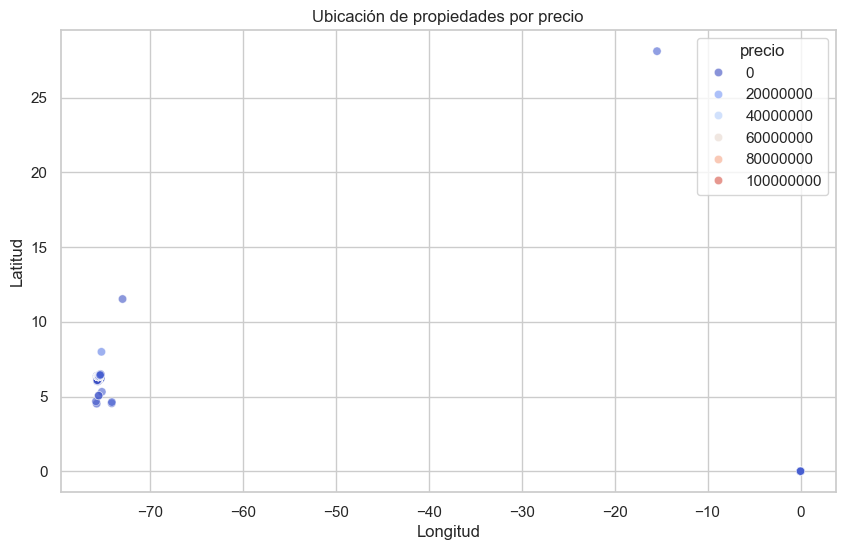

In [27]:
# Relación entre ubicación y precio (si hay coordenadas)


if 'latitud' in df.columns and 'longitud' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='longitud', y='latitud', hue='precio', palette='coolwarm', alpha=0.6)
    plt.title('Ubicación de propiedades por precio')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.show()

In [28]:
from scipy.stats import skew, kurtosis
# Análisis de sesgo y curtosis del precio
print(f"Sesgo del precio: {skew(df['precio'].dropna()):.2f}")
print(f"Curtosis del precio: {kurtosis(df['precio'].dropna()):.2f}")

Sesgo del precio: 6.17
Curtosis del precio: 89.88


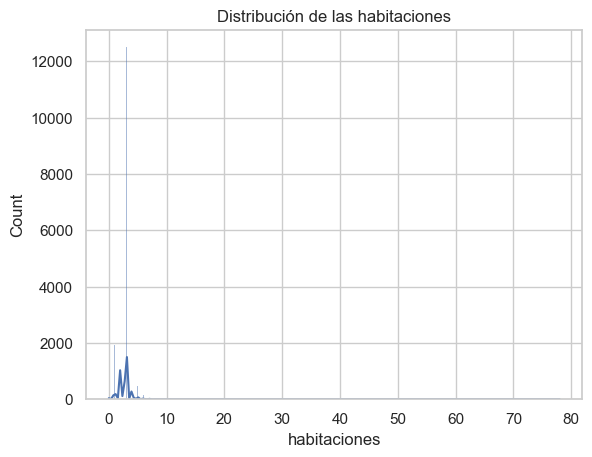

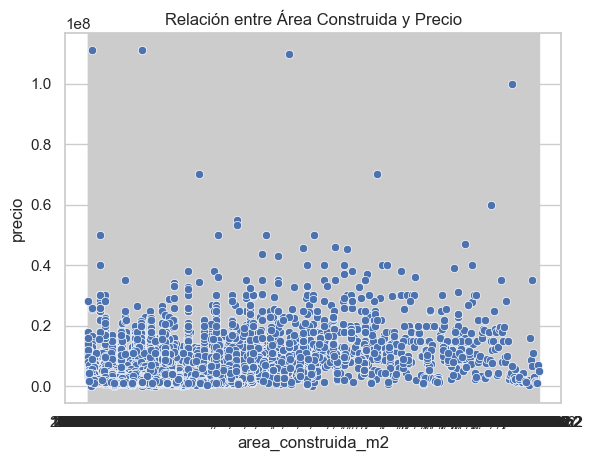

In [32]:
# Distribuciones
sns.histplot(df['habitaciones'], kde=True)
plt.title('Distribución de las habitaciones')
plt.show()

# Relación entre precio y otras variables
sns.scatterplot(data=df, x='area_construida_m2', y='precio')
plt.title('Relación entre Área Construida y Precio')
plt.show()



## Conclusiones

En este análisis exploratorio, hemos examinado la distribución de los precios de arriendo y la correlación entre las variables. Estos hallazgos servirán como base para el siguiente paso en el proyecto: la limpieza de datos y el modelado.